In [14]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [28]:
# import dataset
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [29]:
Selected_Columns = [
    'Age_08_04',
    'KM',
    'HP',
    'Gears',
    'cc',
    'Doors',
    'Quarterly_Tax',
    'Weight',
    'Price',
]

In [30]:
data1 = data[Selected_Columns]
data1.head()

,Age_08_04,KM,HP,Gears,cc,Doors,Quarterly_Tax,Weight,Price
0,23,46986,90,5,2000,3,210,1165,13500
1,23,72937,90,5,2000,3,210,1165,13750
2,24,41711,90,5,2000,3,210,1165,13950
3,26,48000,90,5,2000,3,210,1165,14950
4,30,38500,90,5,2000,3,210,1170,13750


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   Gears          1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [32]:
data1.isna().sum()

Age_08_04        0
KM               0
HP               0
Gears            0
cc               0
Doors            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

In [33]:
#'\033[0m' ends the bold formatting
print('\033[1m','\n Describe the given data set to see more information on how they discributed','\033[1m') 
data1.describe().T

 
 Describe the given data set to see more information on how they discributed 


,count,mean,std,min,25%,50%,75%,max
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0


In [34]:
print('There are ',data1.shape[0],'rows and ',data1.shape[1],'columns in the dataset.')

There are  1436 rows and  9 columns in the dataset.


In [36]:
print('The Standard Deviation of Profit is', data1['Price'].describe().std(),
      '\n''And the Mean of Profit is',data1['Price'].describe().mean())

The Standard Deviation of Profit is 9693.856995090318 
And the Mean of Profit is 10367.973637180632


In [37]:
print('\033[1m','\033[91m','There are',data1.duplicated().sum(),'\033[91m','duplicate values in the dateset.''\033[1m') 

  There are 1  duplicate values in the dateset.


In [38]:
data1.corr().style.background_gradient(cmap='coolwarm')

,Age_08_04,KM,HP,Gears,cc,Doors,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.005364,-0.098084,-0.148359,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.015023,0.102683,-0.036197,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.209477,0.035856,0.092424,-0.298432,0.089614,0.314990
Gears,-0.005364,0.015023,0.209477,1.000000,0.014629,-0.160141,-0.005452,0.020613,0.063104
cc,-0.098084,0.102683,0.035856,0.014629,1.000000,0.079903,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,-0.160141,0.079903,1.000000,0.109363,0.302618,0.185326
Quarterly_Tax,-0.198431,0.278165,-0.298432,-0.005452,0.306996,0.109363,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.020613,0.335637,0.302618,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.063104,0.126389,0.185326,0.219197,0.581198,1.000000


# EDA

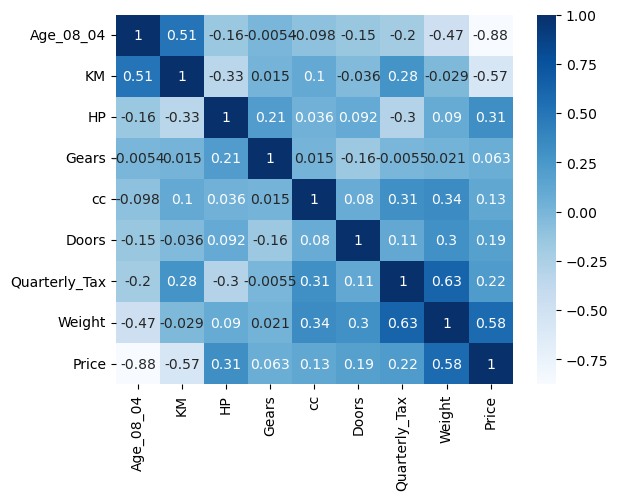

In [39]:
sns.heatmap(data1.corr(),annot=True,cmap='Blues')
plt.show()

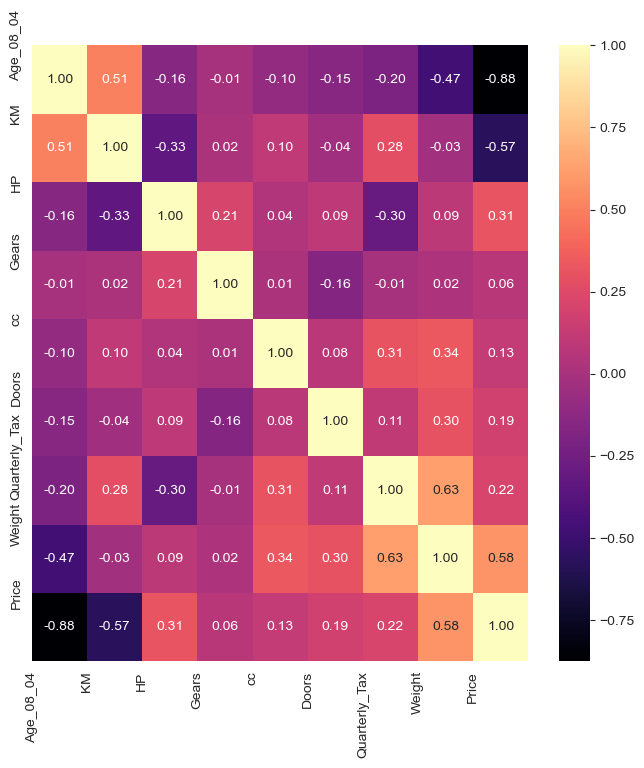

In [41]:
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

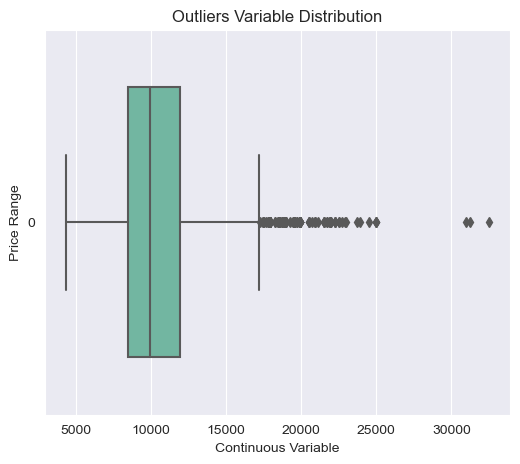

In [46]:
plt.rcParams['figure.figsize'] = [6,5]
sns.boxplot(data=data1['Price'], orient="h", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Price Range")
plt.xlabel("Continuous Variable")

plt.show()

#### Could see more data concentrated above the mean and there are outliers identified.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

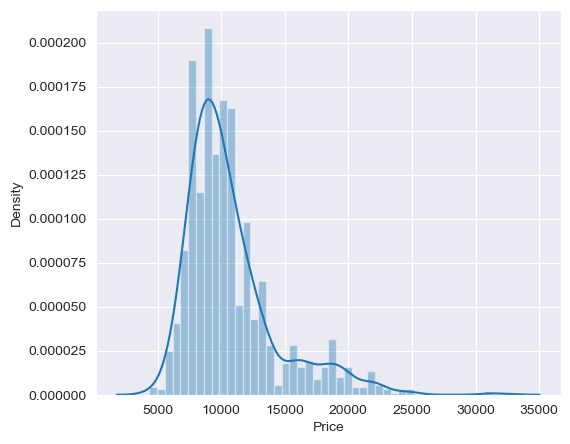

In [48]:
sns.distplot(data1['Price'])

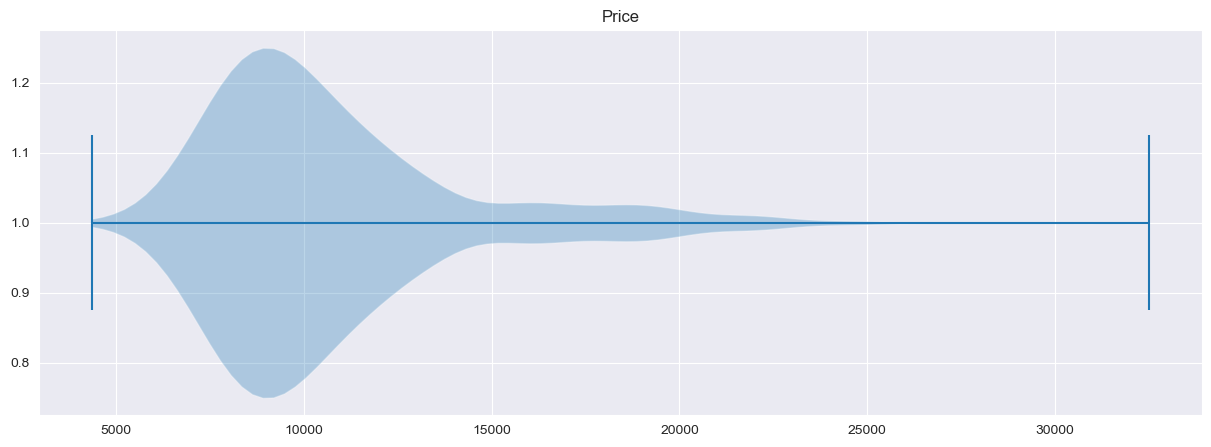

In [49]:
plt.figure(figsize=(15,5))
plt.violinplot(data1['Price'],vert=False)
plt.title("Price")
plt.show()

## Model Development

In [53]:
# spliting Dataset in Dependent & Independent Variables
X = data1.iloc[:, :-1]    # independent varible
y = data1.iloc[:, -1]     # dependent variable

y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [55]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077,)
Shape of y_test (359,)


In [56]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7719638138218422
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605136
RMSE:  1402.0810748973888


#### Polynomial Regression - 2nd degree 

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.7719638138218422
R2_score (train):  0.9115151013034083
R2_score (test):  0.8631701158624697
RMSE:  1393.4624292373408


## Ridge Regression 

In [61]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=1777, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=1777))])

In [62]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  -105.51091002702951
R2_score (train):  0.8459233192855724
R2_score (test):  0.8477686084350097
RMSE:  1469.7954301447778


## Lasso Regression

In [63]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.412e+08, tolerance: 2.742e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [64]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.508e+08, tolerance: 2.549e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.539e+08, tolerance: 2.464e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.818e+08, toleranc

CV:  -182802.85156372463
R2_score (train):  0.9251872930199168
R2_score (test):  0.7581328857181608
RMSE:  1852.649210131711


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+08, tolerance: 2.463e+08
  model = cd_fast.enet_coordinate_descent(


### Decision Tree Regression

In [67]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8178063531983544
R2_score (train):  1.0
R2_score (test):  0.8487794082528879
RMSE:  1464.9076624859424


### Random Forest Regression 

In [69]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=1200, random_state=0)

In [70]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8945485856642064
R2_score (train):  0.9862046713960829
R2_score (test):  0.9191514580281257
RMSE:  1071.1267865054385


### Measuring the Error

In [74]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [75]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])

In [77]:
predict.head(10)

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1402.081075,0.864031,0.861472,0.771964
1,Polynomial Regression (2nd),1393.462429,0.911515,0.863170,0.771964
2,Ridge Regression,1469.795430,0.845923,0.847769,-105.510910
3,Lasso Regression,1852.649210,0.925187,0.758133,-182802.851564
4,Decision Tree Regression,1464.907662,1.000000,0.848779,0.817806
5,Random Forest Regression,1071.126787,0.986205,0.919151,0.894549


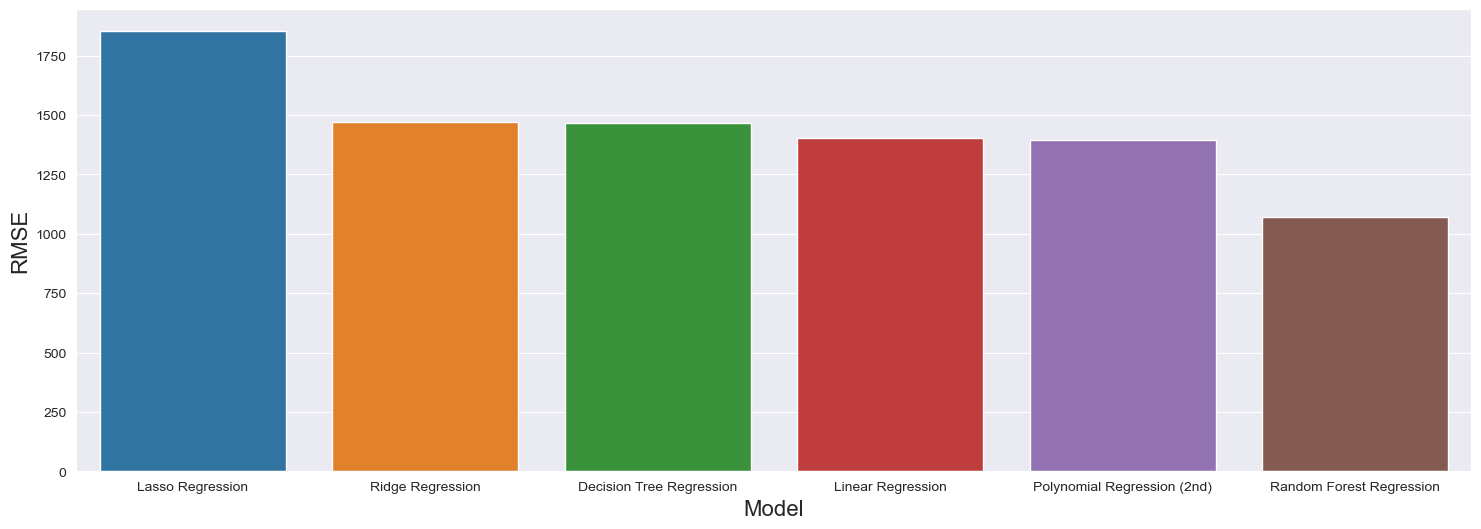

In [78]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()